PART B – Logistic Regression
The ‘Default.csv’ file, uploaded on Moodle, contains details of the characteristics of 2700+ customers of a credit
institution and whether they have a loan default on record or not.
In addition to the dichotomous dependent variable [ No default on record (0) / Default on record (1)], customer
characteristics provided are:
• Gender
0=Male, 1=Female
• Age in years
• Years of education
• Retired
0=not retired, 1=retired
• Household income in thousands
• Credit card debt in thousands
• Other debt in thousands
• Marital status
0=unmarried, 1=married
• Home ownership
0=rents, 1=owns home
Using these data, you are required to estimate a binary logistic regression model to facilitate understanding of
the relationships between the given customer characteristics and classification of default. If you deem it useful,
you may employ dimension reduction techniques. In your report you should:
1. Use descriptive statistics and appropriate visualisations to provide a preliminary understanding of the
variables in the dataset.
2. Describe the model building steps you undertook in the process of arriving at your final logistic
regression model. The rationale for rejecting intermediate models should be explained clearly.
3. Provide a succinct summary of the parameters of your final model, verify that relevant assumptions are
met and discuss odds ratios, the confusion matrix and measures of model fit.

# General Logistic Equation

$E(y) = \frac{e^{\beta_0+\beta_1 x}}{1+e^{\beta_0+\beta_1 x}}$

# Install and load relevant libraries

In [8]:
#install.packages('car')
library(car)
#install.packages('caret')
library(caret)
#install.packages('olsrr')
library(olsrr)
#install.packages('ggplot2')
library(ggplot2)
#install.packages('ggthemes')
library(ggthemes)
#install.packages('scales')
library(scales)
#install.packages('Amelia')
library(Amelia)
#install.packages('dplyr')
library(dplyr)
#install.packages('leaps')
library(leaps)
#install.packages('haven')
library(haven)
#install.packages('gridExtra')
library(gridExtra)
#install.packages('regclass')
library(regclass)
#install.packages('purrr')
library(purrr)

In [7]:
#Turn off warnings 
options(warn=-1)
#Turn on warnings 
#options(warn=0)

In [ ]:
Intro 
What is logistic regression 
explanation of Log odds 

Description of the data 
Train test split 
Transformations 

Modelling process 
Assumptions of Logistic regression 
outlier removal 
Model selection parameteers
initial model - all variables
Backwards selection 
removal of insignificant variables 
Transformations to variables - log 
fianl model 

Model selection parameteers 
AIC 
Psuedo R^2 
Log odds 

1st model - all variables 
2nd - insignif variables removed 
3rd - outliers removed 
4th - outliers removed log applied
5th - fianl model as many varaiable removed 



Final Model




# Load the data

In [284]:
#Import data 
data <- read.csv('Default.csv')

In [285]:
str(data)
#Gender, retire, default, marital, homeown need to be changed to factor variables 
#2721 obs. of  10 variables

'data.frame':	2721 obs. of  10 variables:
 $ gender  : int  0 1 0 1 0 1 0 1 0 0 ...
 $ age     : int  75 63 53 61 31 46 47 58 71 25 ...
 $ ed      : int  16 13 15 16 15 10 15 11 8 17 ...
 $ retire  : int  1 1 0 0 0 0 0 0 0 0 ...
 $ income  : int  13 55 36 33 20 54 62 125 146 13 ...
 $ creddebt: num  0.4973 1.3901 0.4186 0.0755 0.2047 ...
 $ othdebt : num  0.829 2.735 0.625 1.376 2.175 ...
 $ default : int  0 0 0 0 0 0 0 0 0 0 ...
 $ marital : int  1 1 1 0 0 0 0 0 1 0 ...
 $ homeown : int  1 1 1 1 0 1 1 1 0 1 ...


In [288]:
summary(data)

 gender        age              ed        retire       income       
 0:1313   Min.   :18.00   Min.   : 6.00   0:2412   Min.   :   9.00  
 1:1408   1st Qu.:28.00   1st Qu.:12.00   1: 309   1st Qu.:  23.00  
          Median :42.00   Median :15.00            Median :  37.00  
          Mean   :43.91   Mean   :14.76            Mean   :  54.69  
          3rd Qu.:58.00   3rd Qu.:17.00            3rd Qu.:  64.00  
          Max.   :79.00   Max.   :23.00            Max.   :1073.00  
    creddebt            othdebt         default  marital  homeown 
 Min.   :  0.00136   Min.   :  0.0167   0:1551   0:1429   0: 995  
 1st Qu.:  0.42412   1st Qu.:  1.0539   1:1170   1:1292   1:1726  
 Median :  1.00036   Median :  2.1961                             
 Mean   :  2.20815   Mean   :  3.9295                             
 3rd Qu.:  2.27236   3rd Qu.:  4.6438                             
 Max.   :109.07260   Max.   :141.4591                             

In [12]:
#checking for any missing data - NO MISSING DATA 
sum(is.na(data))

[1] 0

# Transforming the data

In [6]:
#Convert 0 to M and 1 to F for Gender 
data[data$gender ==0,]$gender <- 'M'
data[data$gender ==1,]$gender <- 'F'

In [7]:
#Convert 0 to M and 1 to F for Gender 
data[data$default ==0,]$default <- 'Repayed'
data[data$default ==1,]$default <- 'Default'

In [8]:
#Convert 0 to M and 1 to F for Gender 
data[data$retire ==0,]$retire <- 'Working'
data[data$retire ==1,]$retire <- 'Retired'

In [9]:
#Convert 0 to M and 1 to F for Gender 
data[data$marital ==0,]$marital <- 'Unmarried'
data[data$marital ==1,]$marital <- 'Married'

In [10]:
#Convert 0 to M and 1 to F for Gender 
data[data$homeown ==0,]$homeown <- 'Rent'
data[data$homeown ==1,]$homeown <- 'Homeowner'

In [287]:
#Convert variables to factors 
data$gender <- as.factor(data$gender)
data$marital <- as.factor(data$marital)
data$retire <- as.factor(data$retire)
data$default <- as.factor(data$default)
data$homeown <- as.factor(data$homeown)

In [147]:
head(data)

,gender,age,ed,retire,income,creddebt,othdebt,default,marital,homeown
,<fct>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,0,75,16,1,13,0.497250,0.828750,0,1,1
2,1,63,13,1,55,1.390125,2.734875,0,1,1
3,0,53,15,0,36,0.418644,0.625356,0,1,1
4,1,61,16,0,33,0.075504,1.376496,0,0,1
5,0,31,15,0,20,0.204680,2.175320,0,0,0
6,1,46,10,0,54,0.754272,3.133728,0,0,1


# Descriptive stats

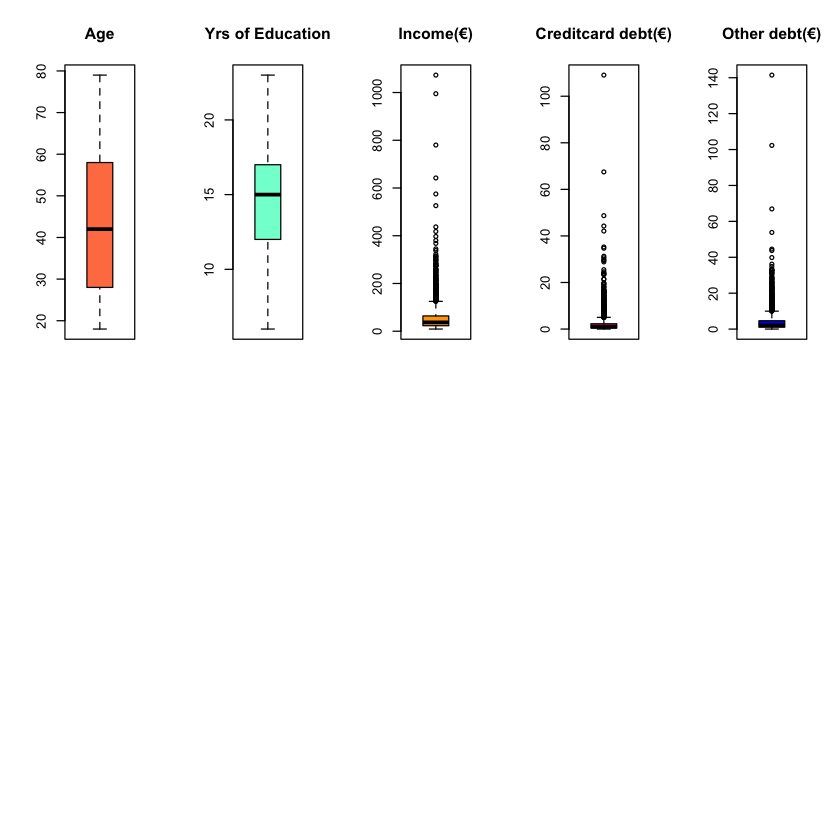

In [32]:
#Boxplot - of non catagorical variables 
# check variables for normality 
par(mfrow = c(2, 5)) # Create a 4 x 3 plotting matrix
boxplot(data$age, main = "Age", main = "", col = 'coral')
boxplot(data$ed, main = "Yrs of Education", main = "", col = 'aquamarine')
boxplot(data$income, main = "Income(€)", main = "", col = 'orange')
boxplot(data$creddebt, main = "Creditcard debt(€)", main = "", col = 'deeppink')
boxplot(data$othdebt, main = "Other debt(€)", main = "", col = 'blue')



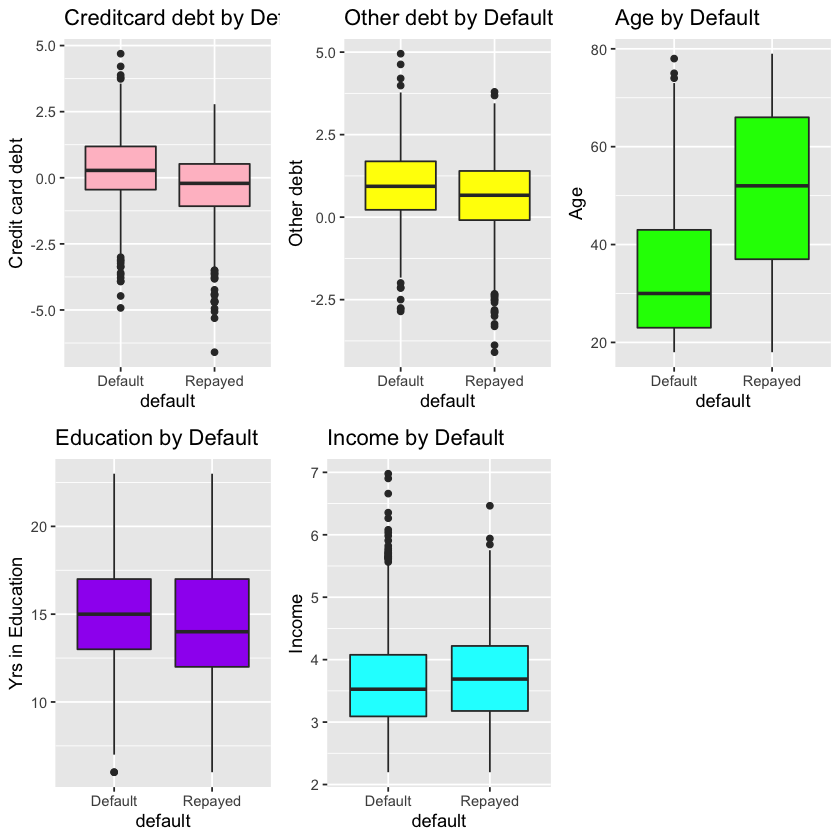

In [50]:
grid.arrange(
ggplot(data, aes(default, log(creddebt))) + 
  geom_boxplot(fill='pink') +
  ggtitle("Creditcard debt by Default") + 
  ylab("Credit card debt"),

ggplot(data, aes(default, log(othdebt))) + 
  geom_boxplot(fill='yellow') +
  ggtitle("Other debt by Default") + 
  ylab("Other debt"),

ggplot(data, aes(default, age)) + 
  geom_boxplot(fill='green') +
  ggtitle("Age by Default") + 
  ylab("Age"),

ggplot(data, aes(default, ed)) + 
  geom_boxplot(fill='purple') +
  ggtitle("Education by Default") + 
  ylab("Yrs in Education"),

ggplot(data, aes(default, log(income))) + 
  geom_boxplot(fill='cyan') +
  ggtitle("Income by Default") + 
  ylab("Income"),
ncol = 3)



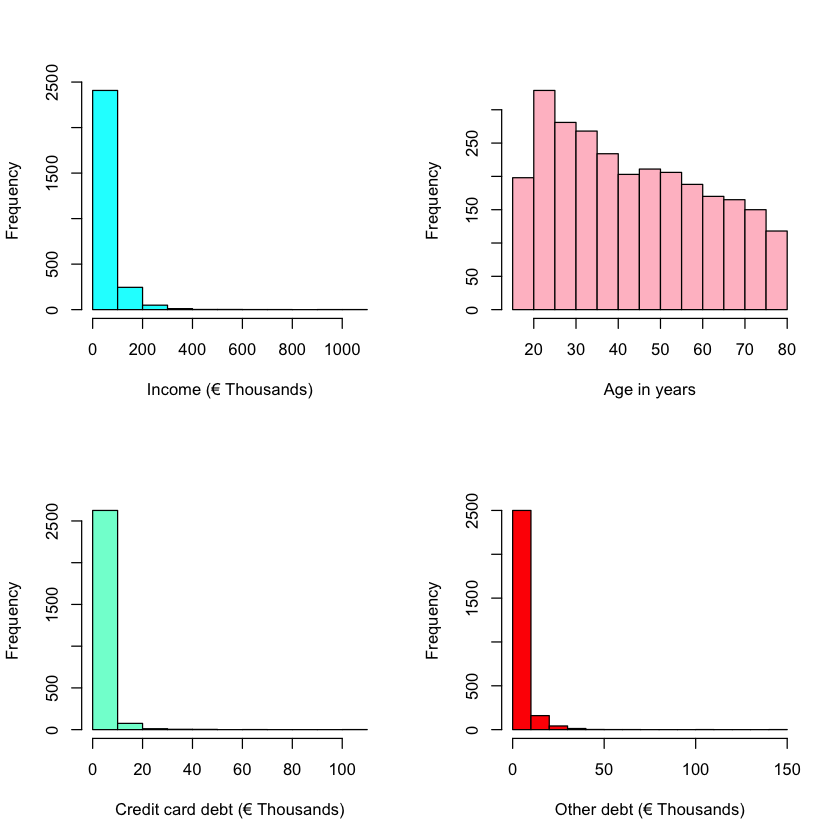

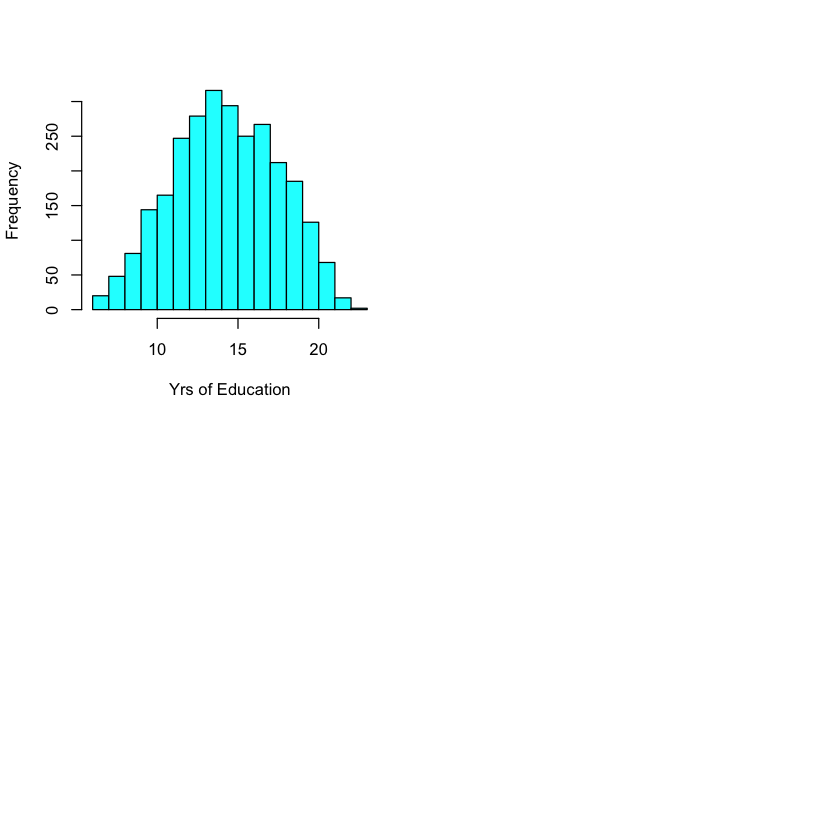

In [448]:
par(mfrow = c(2, 2)) # Create a 4 x 3 plotting matrix
hist(data$income, xlab = "Income (€ Thousands)", main = "", col = 'cyan')
hist(data$age, xlab = "Age in years", main = "", col = 'pink')
hist(data$creddebt, xlab = "Credit card debt (€ Thousands)", main = "", col = 'aquamarine')
hist(data$othdebt, xlab = "Other debt (€ Thousands)", main = "", col = 'red')
hist(data$ed, xlab = "Yrs of Education", main = "", col = 'cyan')

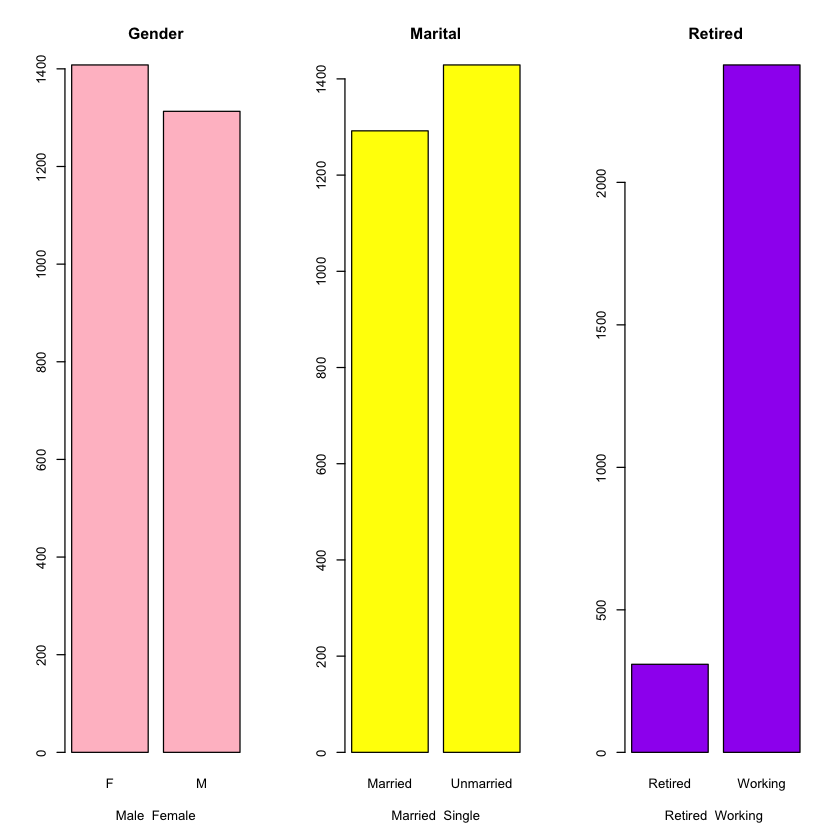

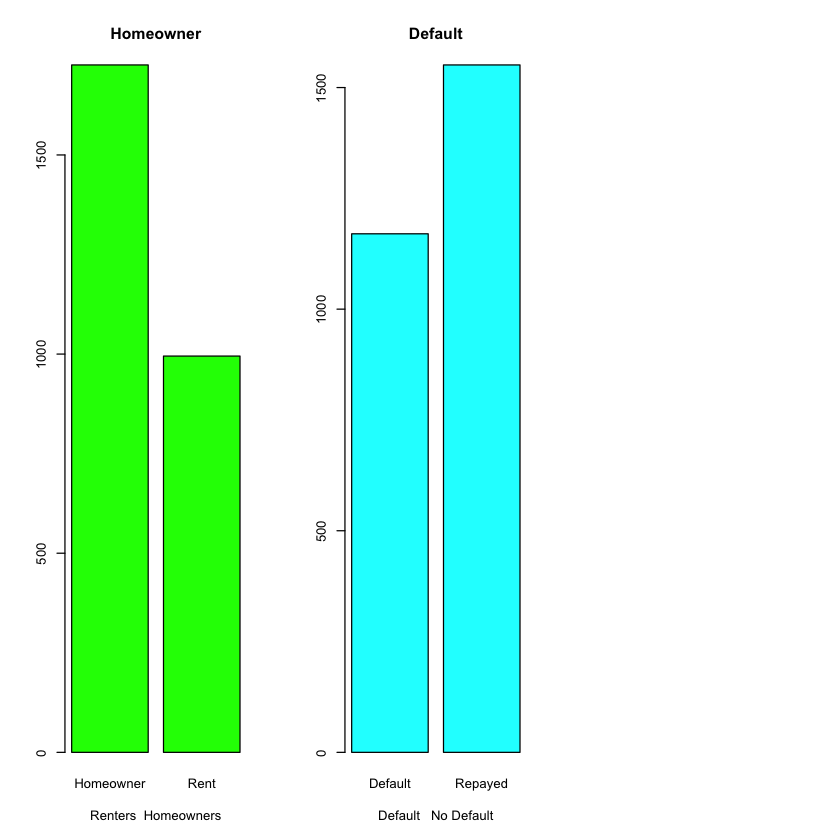

In [46]:
# Simple Bar Plot 
par(mfrow = c(1,3)) # Create a plotting matrix
counts1 <- table(data$gender)
barplot(counts1, main="Gender", 
   xlab="Male  Female",col='pink')
counts2 <- table(data$marital)
barplot(counts2, main="Marital", 
   xlab="Married  Single",col='yellow')
counts3 <- table(data$retire)
barplot(counts3, main="Retired", 
   xlab="Retired  Working ",col='purple')
counts4 <- table(data$homeown)
barplot(counts4, main="Homeowner", 
   xlab="Renters  Homeowners",col='green')
counts5 <- table(data$default)
barplot(counts5, main="Default", 
   xlab="Default   No Default",col='cyan')

In [184]:
plotVar <- function(var, breaks=20, label='')
{
    hist(var, freq=FALSE, breaks=breaks, col='lightblue', 
         main=paste('Histogram of', label), xlab=label)
    curve(dnorm(x, mean=mean(var), sd=sd(var)), 
          from=min(var), to=max(var),
          col='red', lw=4, add=TRUE)
}

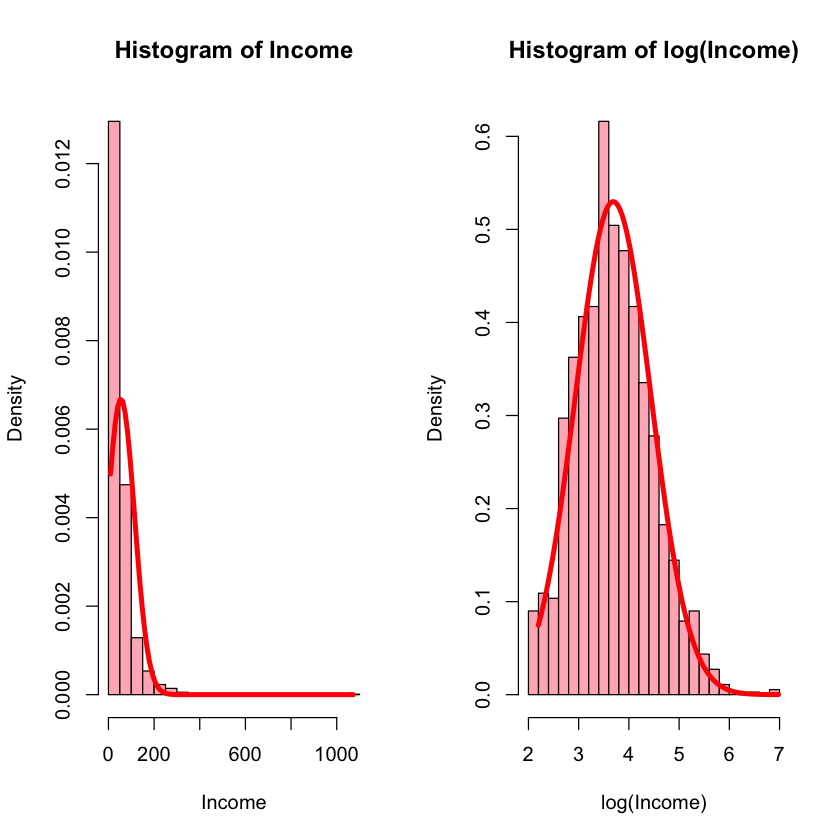

In [181]:
par(mfrow=c(1,2))
plotVar(train$income, label='Income')
plotVar(log(train$income), label='log(Income)')

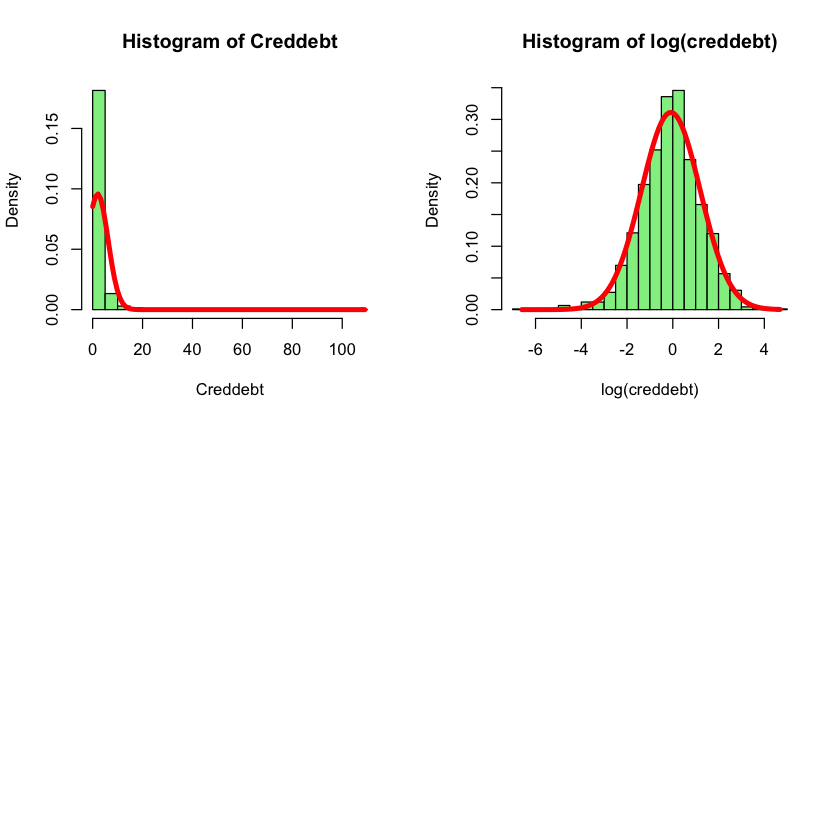

In [183]:
par(mfrow=c(2,2))
plotVar(train$creddebt, label='Creddebt')
plotVar(log(train$creddebt), label='log(creddebt)')


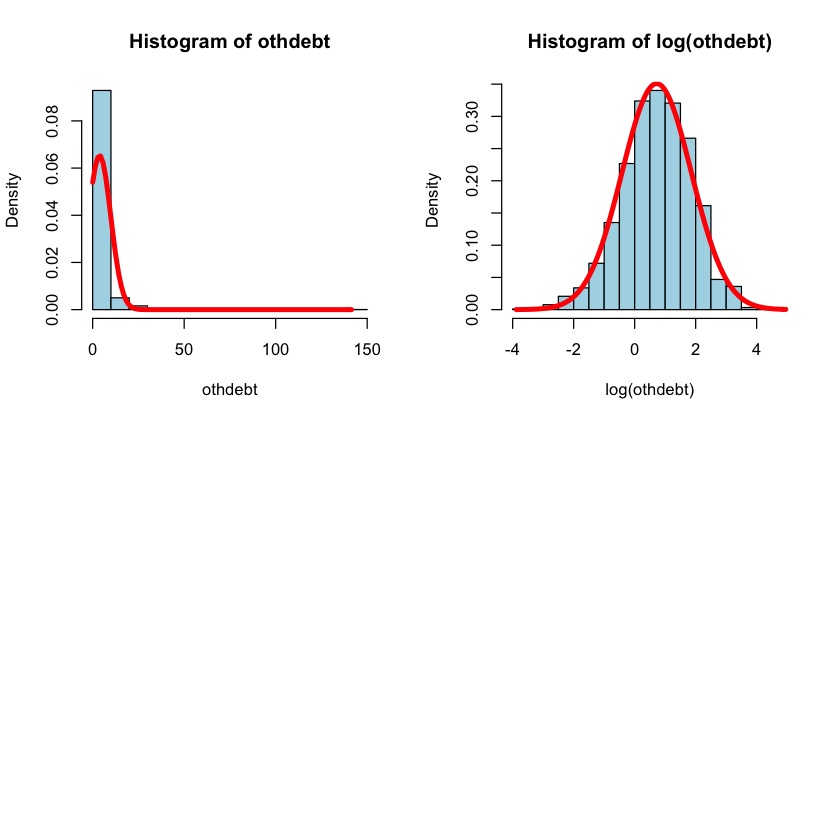

In [185]:
par(mfrow=c(2,2))
plotVar(train$othdebt, label='othdebt')
plotVar(log(train$othdebt), label='log(othdebt)')


In [230]:
#Table to display the distribution of the 
xtabs(~default + gender, data)
xtabs(~default + retire, data)
xtabs(~default + marital, data)
xtabs(~default + homeown, data)

         gender
default     F   M
  Default 603 567
  Repayed 805 746

         retire
default   Retired Working
  Default      15    1155
  Repayed     294    1257

         marital
default   Married Unmarried
  Default     534       636
  Repayed     758       793

         homeown
default   Homeowner Rent
  Default       710  460
  Repayed      1016  535

# First basic Model

In [299]:
fit1 <- glm(default ~., data=train, family='binomial')

In [300]:
summary(fit1)
#shows gender, retire, and marital and not signifigant 


Call:
glm(formula = default ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4098  -0.7060  -0.2396   0.7827   2.9241  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.592433   0.340339   4.679 2.88e-06 ***
gender1     -0.173895   0.122132  -1.424   0.1545    
age         -0.080322   0.005866 -13.693  < 2e-16 ***
ed           0.093802   0.020290   4.623 3.78e-06 ***
retire1     -0.465781   0.423034  -1.101   0.2709    
income      -0.033965   0.004152  -8.180 2.83e-16 ***
creddebt     0.687000   0.071478   9.611  < 2e-16 ***
othdebt      0.186483   0.038458   4.849 1.24e-06 ***
marital1     0.047258   0.122833   0.385   0.7004    
homeown1    -0.239246   0.125006  -1.914   0.0556 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2465.7  on 1833  degrees of freedom
Residual deviance: 1678.3  

In [301]:
#Prediction 
p <- predict(fit1, test, type='response')
pred <- ifelse(p>0.5, 1, 0)
tab<- table(Predicted=pred, Actual=test$default)
tab
sum(diag(tab))/sum(tab)
#Removing outliers Improves prediction by 2% from 77 to 79%

         Actual
Predicted   0   1
        0 207  48
        1  51 153

[1] 0.7843137

In [302]:
#train Prediction 
#Prediction 
p <- predict(fit1, train, type='response')
pred <- ifelse(p>0.5, 1, 0)
tab<- table(Predicted=pred, Actual=train$default)
tab
sum(diag(tab))/sum(tab)
#Removing outliers Improves prediction by 2% from 77 to 79%

         Actual
Predicted   0   1
        0 878 188
        1 226 542

[1] 0.7742639

In [279]:
cbind(Coefficients=coef(fit1), OR =exp(coef(fit1)))

,Coefficients,OR
(Intercept),1.42980731,4.1778941
gender1,0.03847477,1.0392245
age,-0.08218976,0.9210972
ed,0.06719053,1.0694992
retire1,-0.31520953,0.7296360
income,-0.01993449,0.9802629
creddebt,0.44774565,1.5647806
othdebt,0.13954656,1.1497523
marital1,0.01009654,1.0101477
homeown1,-0.27233475,0.7615993


In [271]:
fit1$coef

(Intercept)     gender1         age          ed     retire1      income 
 1.42980731  0.03847477 -0.08218976  0.06719053 -0.31520953 -0.01993449 
   creddebt     othdebt    marital1    homeown1 
 0.44774565  0.13954656  0.01009654 -0.27233475

In [303]:
 NagelkerkeR2(fit1)

$N
[1] 1834

$R2
[1] 0.4721091

In [304]:
#R2
ll.null <- fit1$null.deviance/-2
ll.proposed <- fit1$deviance/-2
(ll.null-ll.proposed) / ll.null

[1] 0.3193193

In [159]:
car::vif(fit1)

gender      age       ed   retire   income creddebt  othdebt  marital 
1.013176 1.696194 1.071907 1.225302 3.500737 2.116704 2.429227 1.035504 
 homeown 
1.038336

In [614]:
#P-value
1 - pchisq(2*(ll.proposed-ll.null), df=(length(fit1$coefficients)-1))

[1] 0

In [314]:
summary(train)

 gender       age              ed        retire       income      
 0:873   Min.   :18.00   Min.   : 6.00   0:1599   Min.   :  9.00  
 1:961   1st Qu.:26.00   1st Qu.:12.00   1: 235   1st Qu.: 21.00  
         Median :39.00   Median :14.00            Median : 32.00  
         Mean   :42.42   Mean   :14.51            Mean   : 38.58  
         3rd Qu.:57.00   3rd Qu.:17.00            3rd Qu.: 49.00  
         Max.   :79.00   Max.   :23.00            Max.   :125.00  
    creddebt           othdebt       default  marital homeown 
 Min.   :0.001364   Min.   :0.0167   0:1104   0:954   0: 710  
 1st Qu.:0.369240   1st Qu.:0.9092   1: 730   1:880   1:1124  
 Median :0.814380   Median :1.7405                            
 Mean   :1.154844   Mean   :2.3757                            
 3rd Qu.:1.558207   3rd Qu.:3.3268                            
 Max.   :5.035212   Max.   :9.9141                            

# Second Model 

In [305]:
fit2 <- glm(default ~ .-gender - retire -marital -homeown, data=train, family='binomial')

In [306]:
summary(fit2)


Call:
glm(formula = default ~ . - gender - retire - marital - homeown, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4840  -0.7153  -0.2609   0.7872   2.8236  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.525224   0.319953   4.767 1.87e-06 ***
age         -0.084075   0.004822 -17.435  < 2e-16 ***
ed           0.088719   0.020095   4.415 1.01e-05 ***
income      -0.033089   0.003963  -8.349  < 2e-16 ***
creddebt     0.695428   0.071381   9.742  < 2e-16 ***
othdebt      0.188504   0.038402   4.909 9.17e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2465.7  on 1833  degrees of freedom
Residual deviance: 1685.2  on 1828  degrees of freedom
AIC: 1697.2

Number of Fisher Scoring iterations: 5


In [330]:
#Prediction 
p <- predict(fit2, test, type='response')
pred <- ifelse(p>0.5, 1, 0)
tab<- table(Predicted=pred, Actual=test$default)
tab
sum(diag(tab))/sum(tab)

         Actual
Predicted   0   1
        0 204  46
        1  54 155

[1] 0.7821351

In [331]:
#train Prediction 
#Prediction 
p <- predict(fit2, train, type='response')
pred <- ifelse(p>0.5, 1, 0)
tab<- table(Predicted=pred, Actual=train$default)
tab
sum(diag(tab))/sum(tab)
#Removing outliers Improves prediction by 2% from 77 to 79%

         Actual
Predicted   0   1
        0 879 192
        1 225 538

[1] 0.7726281

In [309]:
 NagelkerkeR2(fit2)

$N
[1] 1834

$R2
[1] 0.468808

In [310]:
#R2
ll.null <- fit2$null.deviance/-2
ll.proposed <- fit2$deviance/-2
(ll.null-ll.proposed) / ll.null

[1] 0.3165359

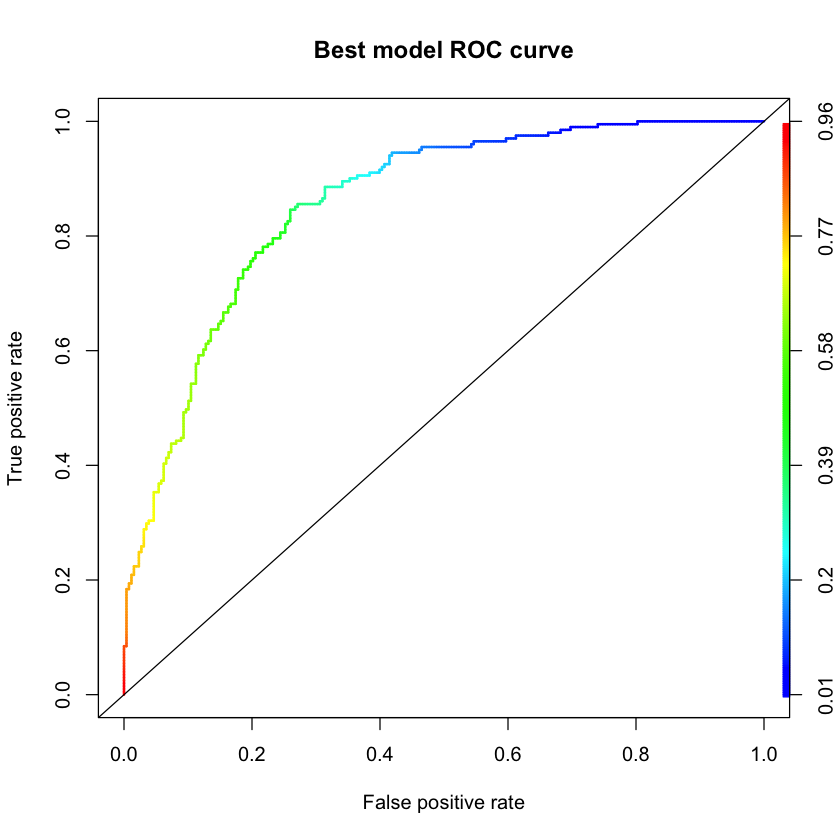

In [311]:
library("ROCR")
pred <- predict(fit2, test, type = "response")
pred <- prediction(pred, test$default)
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize = T, lwd = 2, main = "Best model ROC curve")
abline(a = 0, b = 1)

In [312]:
cbind(Coefficients=coef(fit2), OR =exp(coef(fit2)))

,Coefficients,OR
(Intercept),1.52522379,4.5961720
age,-0.08407492,0.9193624
ed,0.08871876,1.0927733
income,-0.03308932,0.9674521
creddebt,0.69542783,2.0045665
othdebt,0.18850425,1.2074422


In [255]:
hl <- hoslem.test(fit2$y, fitted(fit2), g=10)
hl


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  fit2$y, fitted(fit2)
X-squared = 11.189, df = 8, p-value = 0.1912


In [283]:
summary(test)

 gender       age              ed        retire      income      
 0:438   Min.   :18.00   Min.   : 6.00   0:822   Min.   :  9.00  
 1:449   1st Qu.:25.50   1st Qu.:13.00   1: 65   1st Qu.: 23.00  
         Median :36.00   Median :15.00           Median : 35.00  
         Mean   :39.84   Mean   :14.93           Mean   : 54.72  
         3rd Qu.:52.00   3rd Qu.:17.00           3rd Qu.: 64.00  
         Max.   :79.00   Max.   :22.00           Max.   :780.00  
    creddebt           othdebt        default marital homeown
 Min.   : 0.00494   Min.   : 0.0167   0:308   0:471   0:348  
 1st Qu.: 0.46668   1st Qu.: 1.1128   1:579   1:416   1:539  
 Median : 1.09392   Median : 2.2680                          
 Mean   : 2.62034   Mean   : 4.2142                          
 3rd Qu.: 2.68013   3rd Qu.: 4.7762                          
 Max.   :48.70452   Max.   :66.9279                          

In [254]:
library(ResourceSelection)

ResourceSelection 0.3-5 	 2019-07-22



# Third Model  

In [315]:
fit3 <- glm(default ~ + age +ed +log(income) +log(creddebt) +log(othdebt), data=train, family='binomial')

In [316]:
summary(fit3)


Call:
glm(formula = default ~ +age + ed + log(income) + log(creddebt) + 
    log(othdebt), family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3021  -0.7193  -0.2807   0.7568   3.0718  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    5.794993   0.535000  10.832  < 2e-16 ***
age           -0.083542   0.004602 -18.155  < 2e-16 ***
ed             0.077983   0.019896   3.919 8.88e-05 ***
log(income)   -1.192218   0.147105  -8.105 5.29e-16 ***
log(creddebt)  0.570263   0.072891   7.824 5.14e-15 ***
log(othdebt)   0.455191   0.086198   5.281 1.29e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2465.7  on 1833  degrees of freedom
Residual deviance: 1700.4  on 1828  degrees of freedom
AIC: 1712.4

Number of Fisher Scoring iterations: 5


In [321]:
#Prediction 
p <- predict(fit3, test, type='response')
pred <- ifelse(p>0.5, 1, 0)
tab<- table(Predicted=pred, Actual=test$default)
tab
sum(diag(tab))/sum(tab)

         Actual
Predicted   0   1
        0 208  50
        1  50 151

[1] 0.7821351

In [320]:
#Prediction 
p <- predict(fit3, train, type='response')
pred <- ifelse(p>0.5, 1, 0)
tab<- table(Predicted=pred, Actual=train$default)
tab
sum(diag(tab))/sum(tab)

         Actual
Predicted   0   1
        0 902 199
        1 202 531

[1] 0.7813522

In [322]:
 NagelkerkeR2(fit3)

$N
[1] 1834

$R2
[1] 0.4614582

In [323]:
#R2
ll.null <- fit3$null.deviance/-2
ll.proposed <- fit3$deviance/-2
(ll.null-ll.proposed) / ll.null

[1] 0.3103759

,gender,age,ed,retire,income,creddebt
gender,1.00,0.00,0.01,0.01,-0.04,-0.03
age,0.00,1.00,-0.07,0.56,0.23,0.15
ed,0.01,-0.07,1.00,-0.10,0.20,0.12
retire,0.01,0.56,-0.10,1.00,-0.17,-0.11
income,-0.04,0.23,0.20,-0.17,1.00,0.73
creddebt,-0.03,0.15,0.12,-0.11,0.73,1.00


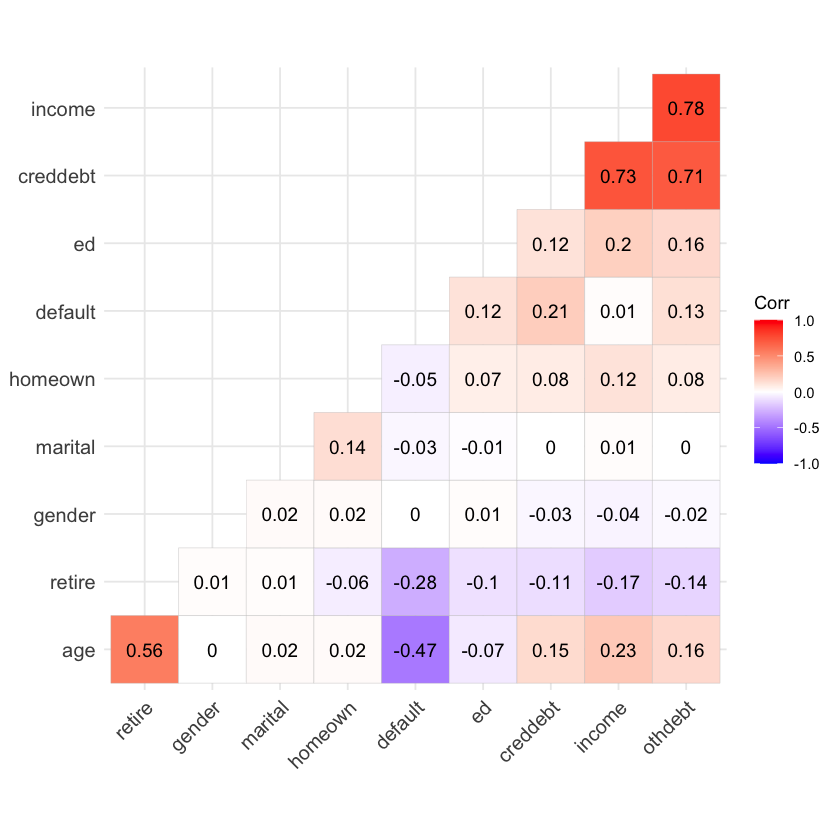

In [623]:
#correlation matrix ### checking variables for multicoliniarity  
library(ggcorrplot)
#Data needs to be all numeric
corr <- round(cor(data1, method = 'pearson'), digits = 2)
head(corr[, 1:6])
ggcorrplot(corr, hc.order = TRUE, type = "lower",
           lab = TRUE)

# Outliers removed

In [289]:
data1 <- data
#remove outliers from Original income data
outliers <- boxplot.stats(data$income)$out#Remove outliers from original data 
outliers1 <- boxplot.stats(data$othdebt)$out 
outliers2 <- boxplot.stats(data$creddebt)$out 
str(outliers)
str(outliers1)
str(outliers2)
out <- data[-which(data$income %in% outliers),]
out <- out[-which(out$othdebt %in% outliers1),] 
out <- out[-which(out$creddebt %in% outliers2),]

 int [1:209] 146 237 345 133 158 132 165 255 126 245 ...
 num [1:221] 13.1 26 10.1 11.5 29 ...
 num [1:278] 8.85 7.91 5.78 7.66 6.11 ...


In [295]:
summary(out)

 gender        age              ed        retire       income      
 0:1095   Min.   :18.00   Min.   : 6.00   0:1999   Min.   :  9.00  
 1:1198   1st Qu.:26.00   1st Qu.:12.00   1: 294   1st Qu.: 21.00  
          Median :38.00   Median :15.00            Median : 32.00  
          Mean   :42.41   Mean   :14.57            Mean   : 38.57  
          3rd Qu.:57.00   3rd Qu.:17.00            3rd Qu.: 49.00  
          Max.   :79.00   Max.   :23.00            Max.   :125.00  
    creddebt           othdebt       default  marital  homeown 
 Min.   :0.001364   Min.   :0.0167   0:1362   0:1194   0: 881  
 1st Qu.:0.365400   1st Qu.:0.9029   1: 931   1:1099   1:1412  
 Median :0.809100   Median :1.7412                             
 Mean   :1.140018   Mean   :2.3822                             
 3rd Qu.:1.520840   3rd Qu.:3.2959                             
 Max.   :5.035212   Max.   :9.9535                             

In [290]:
#Convert variables to factors 
out$gender <- as.factor(out$gender)
out$marital <- as.factor(out$marital)
out$retire <- as.factor(out$retire)
out$default <- as.factor(out$default)
out$homeown <- as.factor(out$homeown)
str(out)

'data.frame':	2293 obs. of  10 variables:
 $ gender  : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 1 1 1 1 ...
 $ age     : int  75 63 53 61 31 46 47 25 68 54 ...
 $ ed      : int  16 13 15 16 15 10 15 17 17 10 ...
 $ retire  : Factor w/ 2 levels "0","1": 2 2 1 1 1 1 1 1 2 1 ...
 $ income  : int  13 55 36 33 20 54 62 13 19 119 ...
 $ creddebt: num  0.4973 1.3901 0.4186 0.0755 0.2047 ...
 $ othdebt : num  0.829 2.735 0.625 1.376 2.175 ...
 $ default : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ marital : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 2 1 ...
 $ homeown : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 2 2 1 ...


In [298]:
#splitting data into train and test set 
set.seed(123)
dt = sort(sample(nrow(out), nrow(out)*.8))
train<-out[dt,]
test <- out[-dt,]
nrow(train)
nrow(test)

[1] 1834

[1] 459

In [292]:
summary(train)
summary(test)

 gender       age              ed        retire       income       
 0:875   Min.   :18.00   Min.   : 6.00   0:1590   Min.   :   9.00  
 1:959   1st Qu.:30.00   1st Qu.:12.00   1: 244   1st Qu.:  23.00  
         Median :45.00   Median :15.00            Median :  38.00  
         Mean   :45.88   Mean   :14.68            Mean   :  54.68  
         3rd Qu.:61.00   3rd Qu.:17.00            3rd Qu.:  65.00  
         Max.   :79.00   Max.   :23.00            Max.   :1073.00  
    creddebt            othdebt          default  marital homeown 
 Min.   :  0.00136   Min.   :  0.02064   0:1243   0:958   0: 647  
 1st Qu.:  0.40631   1st Qu.:  1.00112   1: 591   1:876   1:1187  
 Median :  0.96294   Median :  2.17655                            
 Mean   :  2.00880   Mean   :  3.79187                            
 3rd Qu.:  2.10484   3rd Qu.:  4.59296                            
 Max.   :109.07260   Max.   :141.45915                            

 gender       age              ed        retire      income      
 0:438   Min.   :18.00   Min.   : 6.00   0:822   Min.   :  9.00  
 1:449   1st Qu.:25.50   1st Qu.:13.00   1: 65   1st Qu.: 23.00  
         Median :36.00   Median :15.00           Median : 35.00  
         Mean   :39.84   Mean   :14.93           Mean   : 54.72  
         3rd Qu.:52.00   3rd Qu.:17.00           3rd Qu.: 64.00  
         Max.   :79.00   Max.   :22.00           Max.   :780.00  
    creddebt           othdebt        default marital homeown
 Min.   : 0.00494   Min.   : 0.0167   0:308   0:471   0:348  
 1st Qu.: 0.46668   1st Qu.: 1.1128   1:579   1:416   1:539  
 Median : 1.09392   Median : 2.2680                          
 Mean   : 2.62034   Mean   : 4.2142                          
 3rd Qu.: 2.68013   3rd Qu.: 4.7762                          
 Max.   :48.70452   Max.   :66.9279                          

# Model with outliers removed

In [763]:
fit3 <- glm(default ~ ., data=otrain, family='binomial')

In [764]:
fit2 <- glm(default ~ age + ed + income + creddebt
            , data=Otrain, family='binomial')

In [765]:
summary(fit2)


Call:
glm(formula = default ~ age + ed + income + creddebt, family = "binomial", 
    data = Otrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7088  -0.7362  -0.2709   0.8214   2.7347  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.396027   0.321790   4.338 1.44e-05 ***
age         -0.084046   0.004810 -17.473  < 2e-16 ***
ed           0.080099   0.019414   4.126 3.69e-05 ***
income      -0.015489   0.002283  -6.786 1.15e-11 ***
creddebt     0.562599   0.041913  13.423  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2567.7  on 1953  degrees of freedom
Residual deviance: 1772.0  on 1949  degrees of freedom
AIC: 1782

Number of Fisher Scoring iterations: 6


In [762]:
#Prediction 
p <- predict(fit2, Otest, type='response')
pred <- ifelse(p>0.5, 1, 0)
tab<- table(Predicted=pred, Actual=Otest$default)
tab
sum(diag(tab))/sum(tab)
#Removing outliers Improves prediction by 2% from 77 to 79%

         Actual
Predicted   0   1
        0 260 123
        1  53 331

[1] 0.7705346

In [725]:
vif(fit2)

age       ed   income creddebt  othdebt  homeown 
1.358167 1.097725 3.560033 2.273436 2.455309 1.019012

# Stepwise variable selection

In [191]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


The following object is masked from ‘package:olsrr’:

    cement




In [246]:
fit_step <- stepAIC(fit1, direction='backward', trace=FALSE)
fit_step


Call:  glm(formula = default ~ age + ed + income + creddebt + othdebt + 
    homeown, family = "binomial", data = train)

Coefficients:
(Intercept)          age           ed       income     creddebt      othdebt  
    1.49207     -0.08419      0.06759     -0.01964      0.44938      0.13988  
   homeown1  
   -0.26632  

Degrees of Freedom: 1833 Total (i.e. Null);  1827 Residual
Null Deviance:	    2306 
Residual Deviance: 1589 	AIC: 1603

In [237]:
#dependent variable only model
fit <- glm(default~ -., data=data, family='binomial')

In [306]:
#summary(fit)

In [456]:
fit_step <- stepAIC(fit1, direction='backward', trace=FALSE)
fit_step


Call:  glm(formula = default ~ age + ed + income + creddebt + othdebt + 
    homeown, family = "binomial", data = data)

Coefficients:
(Intercept)          age           ed       income     creddebt      othdebt  
   -1.54936      0.08770     -0.08188      0.01962     -0.49236     -0.11491  
homeownRent  
   -0.35779  

Degrees of Freedom: 2720 Total (i.e. Null);  2714 Residual
Null Deviance:	    3719 
Residual Deviance: 2472 	AIC: 2486

# bootStepAIC Library to select variables 

In [193]:
library(bootStepAIC)

In [244]:
fit_boot <- boot.stepAIC(fit2, out, B=50)

In [247]:
fit_boot


Summary of Bootstrapping the 'stepAIC()' procedure for

Call:
glm(formula = default ~ . - gender - retire - marital, family = "binomial", 
    data = train)

Bootstrap samples: 50 
Direction: backward 
Penalty: 2 * df

Covariates selected
         (%)
age      100
creddebt 100
ed       100
income   100
othdebt  100
homeown   94

Coefficients Sign
         + (%) - (%)
creddebt   100     0
ed         100     0
othdebt    100     0
age          0   100
homeown1     0   100
income       0   100

Stat Significance
            (%)
age      100.00
creddebt 100.00
ed       100.00
income   100.00
othdebt  100.00
homeown1  87.23


The stepAIC() for the original data-set gave

Call:  glm(formula = default ~ (gender + age + ed + retire + income + 
    creddebt + othdebt + marital + homeown) - gender - retire - 
    marital, family = "binomial", data = train)

Coefficients:
(Intercept)          age           ed       income     creddebt      othdebt  
    1.54093     -0.08533      0.06894     -0.0

In [257]:
#splitting data into train and test set 
set.seed(123)
dt = sort(sample(nrow(data), nrow(data)*.8))
train<-data[dt,]
test <- data[-dt,]
nrow(train)
nrow(test)

[1] 2176

[1] 545

In [240]:
fit5 <- glm(formula = default ~ age + ed + income + creddebt + othdebt , family = "binomial", data = train)

In [241]:
summary(fit5)


Call:
glm(formula = default ~ age + ed + income + creddebt + othdebt, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8694  -0.7119  -0.2764   0.7903   2.7429  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.369218   0.340929   4.016 5.92e-05 ***
age         -0.084185   0.005146 -16.358  < 2e-16 ***
ed           0.065157   0.020422   3.191  0.00142 ** 
income      -0.019872   0.002805  -7.085 1.39e-12 ***
creddebt     0.447068   0.039457  11.330  < 2e-16 ***
othdebt      0.140992   0.021698   6.498 8.15e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2305.5  on 1833  degrees of freedom
Residual deviance: 1593.1  on 1828  degrees of freedom
AIC: 1605.1

Number of Fisher Scoring iterations: 6


In [243]:
#Prediction 
p1 <- predict(fit5, test , type='response')
pred1 <- ifelse(p1>0.5, 1, 0)
tab1<- table(Predicted=pred1, Actual=test$default)
tab1
sum(diag(tab1))/sum(tab1)

         Actual
Predicted   0   1
        0 266 185
        1  42 394

[1] 0.7440812

In [242]:
#Prediction 
p1 <- predict(fit5, train , type='response')
pred1 <- ifelse(p1>0.5, 1, 0)
tab1<- table(Predicted=pred1, Actual=train$default)
tab1
sum(diag(tab1))/sum(tab1)

         Actual
Predicted    0    1
        0 1073  207
        1  170  384

[1] 0.7944384

# Best model

In [324]:
best <- glm(formula = default ~ age+ creddebt 
            , family = "binomial", data = train)

In [325]:
summary(best)


Call:
glm(formula = default ~ age + creddebt, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1181  -0.8069  -0.2372   0.8442   2.8844  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.482618   0.167341  14.836   <2e-16 ***
age         -0.093159   0.004851 -19.205   <2e-16 ***
creddebt     0.586158   0.058739   9.979   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2465.7  on 1833  degrees of freedom
Residual deviance: 1779.5  on 1831  degrees of freedom
AIC: 1785.5

Number of Fisher Scoring iterations: 5


In [326]:
#Prediction 
p1 <- predict(best, test, type='response')
pred1 <- ifelse(p1>0.5, 1, 0)
tab1<- table(Predicted=pred1, Actual=test$default)
tab1
sum(diag(tab1))/sum(tab1)

         Actual
Predicted   0   1
        0 204  54
        1  54 147

[1] 0.7647059

In [327]:
#Prediction 
p1 <- predict(best, train , type='response')
pred1 <- ifelse(p1>0.5, 1, 0)
tab1<- table(Predicted=pred1, Actual=train$default)
tab1
sum(diag(tab1))/sum(tab1)

         Actual
Predicted   0   1
        0 869 196
        1 235 534

[1] 0.7649945

In [328]:
#R2
ll.null <- best$null.deviance/-2
ll.proposed <- best$deviance/-2
(ll.null-ll.proposed) / ll.null

[1] 0.2782827

In [329]:
 NagelkerkeR2(fit2)

$N
[1] 1834

$R2
[1] 0.468808

Age + creddebt -> 76%
age + ed + creddebt + othdebt -> 77.24%
age + ed + creddebt -> 77.06%
age + ed + income + creddebt + othdebt +homeown -> 77.61

# Plotting

In [310]:
#Taken from warranty example code, I do not understand 
exp(cbind(OR = coef(best), confint(best)))

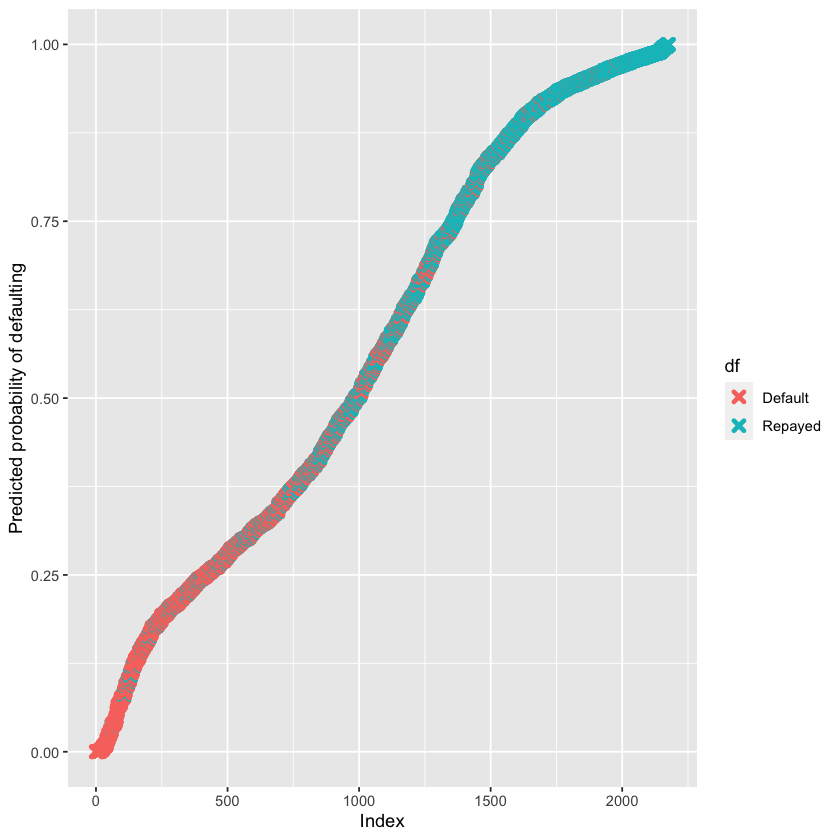

In [594]:
## now we can plot the data
predicted.data <- data.frame(
  probability.of.df=best$fitted.values,
  df=train$default)
 
predicted.data <- predicted.data[
  order(predicted.data$probability.of.df, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)
 
## Lastly, we can plot the predicted probabilities for each sample having
## heart disease and color by whether or not they actually had heart disease
ggplot(data=predicted.data, aes(x=rank, y=probability.of.df)) +
  geom_point(aes(color=df), alpha=1, shape=4, stroke=2) +
  xlab("Index") +
  ylab("Predicted probability of defaulting")

# OddsPlotty 

In [333]:
library(mlbench)
library(caret)
library(ggplot2)
library(OddsPlotty)
library(ggthemes)

In [452]:
glm_mod <- caret::train(default ~.,
                       data= data,
                       method="glm",
                       family="binomial")

In [436]:
summary(glm_mod)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0582  -0.7778   0.2147   0.7030   3.0136  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.455299   0.475463  -3.061 0.002207 ** 
genderM          -0.022720   0.099653  -0.228 0.819656    
age               0.087255   0.004642  18.797  < 2e-16 ***
ed               -0.081927   0.016284  -5.031 4.88e-07 ***
retireWorking    -0.063270   0.330949  -0.191 0.848387    
income            0.019695   0.002219   8.877  < 2e-16 ***
creddebt         -0.491738   0.033606 -14.632  < 2e-16 ***
othdebt          -0.114857   0.016916  -6.790 1.12e-11 ***
maritalUnmarried -0.019930   0.100480  -0.198 0.842774    
homeownRent      -0.354645   0.104642  -3.389 0.000701 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3718.6  on 2720  degrees of freedom
Residual deviance: 2471.9  on

In [332]:
plot <- OddsPlotty::odds_plot(fit2$finalModel,
                             title='odds plot',
                             subtitle='showing odds of default')
plot$odds_plot

ERROR: Error in exp(coef(x)): non-numeric argument to mathematical function


In [334]:
beft_mod <- caret::train(default ~age + ed +income + creddebt + othdebt ,
                       data= train,
                       method="glm",
                       family="binomial")

In [335]:
summary(beft_mod)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4840  -0.7153  -0.2609   0.7872   2.8236  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.525224   0.319953   4.767 1.87e-06 ***
age         -0.084075   0.004822 -17.435  < 2e-16 ***
ed           0.088719   0.020095   4.415 1.01e-05 ***
income      -0.033089   0.003963  -8.349  < 2e-16 ***
creddebt     0.695428   0.071381   9.742  < 2e-16 ***
othdebt      0.188504   0.038402   4.909 9.17e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2465.7  on 1833  degrees of freedom
Residual deviance: 1685.2  on 1828  degrees of freedom
AIC: 1697.2

Number of Fisher Scoring iterations: 5


Waiting for profiling to be done...



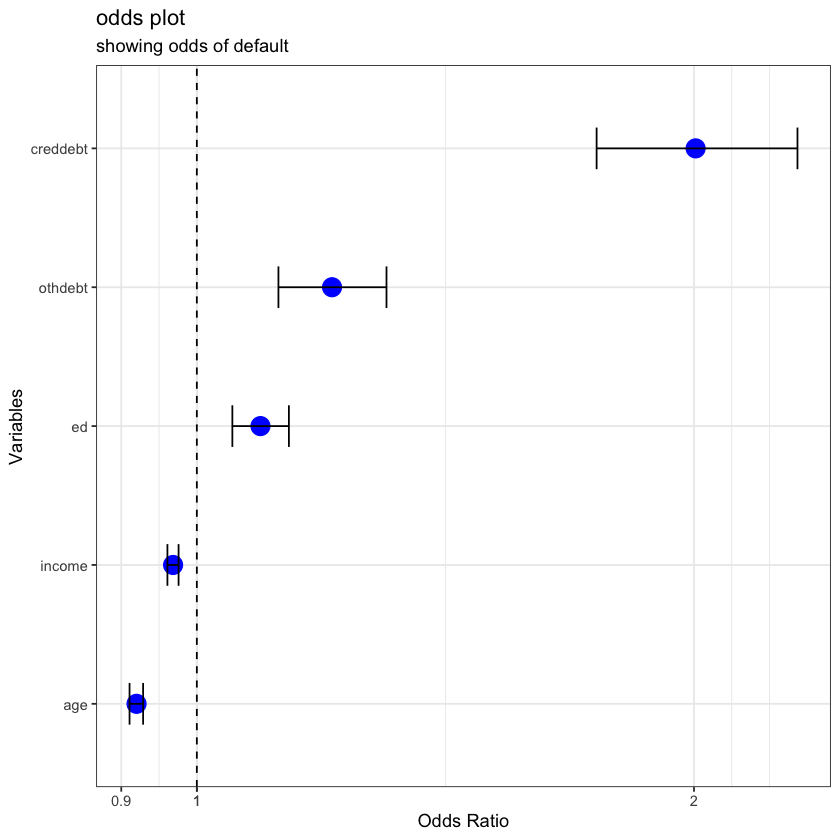

In [336]:
best_plot <- OddsPlotty::odds_plot(beft_mod$finalModel,
                             title='odds plot',
                             subtitle='showing odds of default')
best_plot$odds_plot